In [1]:
from caffe import layers as L, params as P
import caffe
from pylab import *
from tqdm import tqdm_notebook as tqdm

caffe.set_mode_gpu()
caffe.set_device(1)

In [2]:
def net(data_set, batch_size):
    n = caffe.NetSpec()
    n.data, n.label = L.ImageData(
        batch_size=batch_size, 
        source=data_set, 
        is_color=False, 
        new_height=100,
        new_width=100,
        shuffle=True,
        ntop=2)
    
    n['conv1_1'] = L.Convolution(n.data, kernel_size=3, pad=1, num_output=32, weight_filler=dict(type='xavier'))
    n.batch1_1 = L.BatchNorm(n['conv1_1'])
    n.relu1_1 = L.ReLU(n.batch1_1, in_place=False)
    n.conv1_2 = L.Convolution(n.relu1_1, kernel_size=3, pad=1, num_output=64, weight_filler=dict(type='xavier'))
    n.batch1_2 = L.BatchNorm(n.conv1_2)
    n.relu1_2 = L.ReLU(n.batch1_2, in_place=True)
    n.pool1 = L.Pooling(n.relu1_2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.conv2_1 = L.Convolution(n.pool1, kernel_size=3, pad=1, num_output=64, weight_filler=dict(type='xavier'))
    n.batch2_1 = L.BatchNorm(n.conv2_1)
    n.relu2_1 = L.ReLU(n.batch2_1, in_place=True)
    n.conv2_2 = L.Convolution(n.batch2_1, kernel_size=3, pad=1, num_output=96, weight_filler=dict(type='xavier'))
    n.batch2_2 = L.BatchNorm(n.conv2_2)
    n.relu2_2 = L.ReLU(n.batch2_2, in_place=True)
    n.pool2 = L.Pooling(n.relu2_2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.conv3_1 = L.Convolution(n.pool2, kernel_size=3, pad=1, num_output=96, weight_filler=dict(type='xavier'))
    n.batch3_1 = L.BatchNorm(n.conv3_1)
    n.relu3_1 = L.ReLU(n.batch3_1, in_place=True)
    n.conv3_2 = L.Convolution(n.relu3_1, kernel_size=3, pad=1, num_output=128, weight_filler=dict(type='xavier'))
    n.batch3_2 = L.BatchNorm(n.conv3_2)
    n.relu3_2 = L.ReLU(n.batch3_2, in_place=True)
    n.conv3_3 = L.Convolution(n.relu3_2, kernel_size=3, pad=1, num_output=128, weight_filler=dict(type='xavier'))
    n.batch3_3 = L.BatchNorm(n.conv3_3)
    n.relu3_3 = L.ReLU(n.batch3_3, in_place=True)
    n.pool3 = L.Pooling(n.relu3_3, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.conv4_1 = L.Convolution(n.pool3, kernel_size=3, num_output=128, weight_filler=dict(type='xavier'))
    n.batch4_1 = L.BatchNorm(n.conv4_1)
    n.relu4_1 = L.ReLU(n.batch4_1, in_place=True)
    n.conv4_2 = L.Convolution(n.relu4_1, kernel_size=3, num_output=256, weight_filler=dict(type='xavier'))
    n.batch4_2 = L.BatchNorm(n.conv4_2)
    n.relu4_2 = L.ReLU(n.batch4_2, in_place=True)
    n.pool4 = L.Pooling(n.relu4_2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    
    n.fc1 =   L.InnerProduct(n.pool4, num_output=2000, weight_filler=dict(type='xavier'))
    n.batch5_1 = L.BatchNorm(n.fc1)
    n.relu_a1 = L.ReLU(n.batch5_1, in_place=True)
    n.fc2 = L.InnerProduct(n.relu_a1, num_output=1000, weight_filler=dict(type='xavier'))
    n.batch5_2 = L.BatchNorm(n.fc2)
    n.relu_a2 = L.ReLU(n.batch5_2, in_place=True)
    n.fc3 = L.InnerProduct(n.relu_a2, num_output=500, weight_filler=dict(type='xavier'))
    n.batch5_3 = L.BatchNorm(n.fc3)
    n.relu_a3 = L.ReLU(n.batch5_3, in_place=True)
    
    n.score = L.InnerProduct(n.relu_a3, num_output=11, weight_filler=dict(type='xavier'))
    n.loss =  L.SoftmaxWithLoss(n.score, n.label)
    
    n.accuracy_top1 = L.Accuracy(n.score, n.label)
        
    return n.to_proto()
    
with open('proto/vgg10_train.prototxt', 'w') as f:
    f.write(str(net('resources/train.txt', 40)))

with open('proto/vgg10_test.prototxt', 'w') as f:
    f.write(str(net('resources/test.txt', 40)))

In [3]:
solver = caffe.RMSPropSolver('proto/vgg10_solver.prototxt')
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (40, 1, 200, 200)),
 ('label', (40,)),
 ('label_data_1_split_0', (40,)),
 ('label_data_1_split_1', (40,)),
 ('conv1_1', (40, 32, 200, 200)),
 ('batch1_1', (40, 32, 200, 200)),
 ('relu1_1', (40, 32, 200, 200)),
 ('conv1_2', (40, 64, 200, 200)),
 ('batch1_2', (40, 64, 200, 200)),
 ('pool1', (40, 64, 100, 100)),
 ('conv2_1', (40, 64, 100, 100)),
 ('batch2_1', (40, 64, 100, 100)),
 ('conv2_2', (40, 96, 100, 100)),
 ('batch2_2', (40, 96, 100, 100)),
 ('pool2', (40, 96, 50, 50)),
 ('conv3_1', (40, 96, 50, 50)),
 ('batch3_1', (40, 96, 50, 50)),
 ('conv3_2', (40, 128, 50, 50)),
 ('batch3_2', (40, 128, 50, 50)),
 ('conv3_3', (40, 128, 50, 50)),
 ('batch3_3', (40, 128, 50, 50)),
 ('pool3', (40, 128, 25, 25)),
 ('conv4_1', (40, 128, 23, 23)),
 ('batch4_1', (40, 128, 23, 23)),
 ('conv4_2', (40, 256, 21, 21)),
 ('batch4_2', (40, 256, 21, 21)),
 ('pool4', (40, 256, 11, 11)),
 ('fc1', (40, 2000)),
 ('batch5_1', (40, 2000)),
 ('fc2', (40, 1000)),
 ('batch5_2', (40, 1000)),
 ('fc3', (40, 500)

In [ ]:
solver.solve()

### With AdamSolver
base_lr:0.000001 <br>
accuracy: ~70% (15k epoch)
### With SGD the same result, but slower
36 - 64 - 96 - 128 filters - is good, but more.... is bad


In [3]:
from caffe import layers as L, params as P
import caffe
from pylab import *
from tqdm import tqdm_notebook as tqdm

caffe.set_mode_gpu()
caffe.set_device(0)

In [4]:
def show_plots(test_loss, test_acc, test_interval):
    _, ax1 = subplots()
    ax2 = ax1.twinx()
    ax1.plot(test_interval * arange(len(test_loss)), test_loss)
    ax2.plot(test_interval * arange(len(test_acc)), test_acc, 'r')
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('train loss')
    ax2.set_ylabel('test accuracy')
    ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))

In [5]:
def start_solver(solver, epoch=10_0000, batch_size=40, test_interval=500, test_iter=100, train_interval=100):
    train_loss = zeros(int(epoch / train_interval))
    train_acc = zeros(int(epoch / train_interval))
    test_acc = zeros(int(epoch / test_interval))
    test_loss = zeros(int(epoch / test_interval))


    for it in tqdm(range(epoch)):
        solver.step(1)

        if it % train_interval == 0:
            print(f"###### Iterration #{it}")
            train_loss[it // train_interval] = solver.net.blobs['loss'].data
            train_acc[it // train_interval] = solver.net.blobs['accuracy_top1'].data
            print(f"Train net output: accuracy = {train_acc[it // train_interval]}, loss = {train_loss[it // train_interval]}")

        if it % test_interval == 0:
            correct = 0
            for test_it in range(test_iter):
                solver.test_nets[0].forward()

                correct += sum(solver.test_nets[0].blobs['score'].data.argmax(axis=1)
                               == solver.test_nets[0].blobs['label'].data)
                
            test_acc[it // test_interval] = solver.test_nets[0].blobs['accuracy_top1'].data

            test_loss[it // test_interval] = solver.test_nets[0].blobs['loss'].data
            print(f"Test net output: accuracy = {test_acc[it // test_interval]}, loss = {test_loss[it // test_interval]}")

    self.show_plots("Train", train_loss, train_acc, train_interval)
    self.show_plots("Test", test_loss, test_acc, test_interval)
    return train_loss, train_acc, train_interval, test_loss, test_acc, test_interval

In [6]:
solver = caffe.RMSPropSolver('proto/vgg10_solver.prototxt')

In [ ]:
train_loss, train_acc, train_interval, test_loss, test_acc, test_interval = start_solver(solver)

###### Iterration #0
Train net output: accuracy = 0.125, loss = 2.6260039806365967
Test net output: accuracy = 0.0, loss = 2.593100070953369
###### Iterration #100
Train net output: accuracy = 0.07500000298023224, loss = 2.6514995098114014
###### Iterration #200
Train net output: accuracy = 0.17499999701976776, loss = 2.272989273071289
###### Iterration #300
Train net output: accuracy = 0.05000000074505806, loss = 2.462536096572876
###### Iterration #400
Train net output: accuracy = 0.15000000596046448, loss = 2.2725844383239746
###### Iterration #500
Train net output: accuracy = 0.20000000298023224, loss = 2.244187116622925
Test net output: accuracy = 0.17499999701976776, loss = 2.3250467777252197
###### Iterration #600
Train net output: accuracy = 0.125, loss = 2.2689552307128906
###### Iterration #700
Train net output: accuracy = 0.22499999403953552, loss = 2.2332923412323
###### Iterration #800
Train net output: accuracy = 0.15000000596046448, loss = 2.190220594406128
###### Iterra

###### Iterration #7400
Train net output: accuracy = 0.44999998807907104, loss = 1.4637104272842407
###### Iterration #7500
Train net output: accuracy = 0.550000011920929, loss = 1.494066596031189
Test net output: accuracy = 0.375, loss = 1.3265759944915771
###### Iterration #7600
Train net output: accuracy = 0.699999988079071, loss = 1.1247475147247314
###### Iterration #7700
Train net output: accuracy = 0.6000000238418579, loss = 1.2958118915557861
###### Iterration #7800
Train net output: accuracy = 0.625, loss = 1.307471513748169
###### Iterration #7900
Train net output: accuracy = 0.5, loss = 1.360770583152771
###### Iterration #8000
Train net output: accuracy = 0.42500001192092896, loss = 1.2490094900131226
Test net output: accuracy = 0.550000011920929, loss = 1.435854434967041
###### Iterration #8100
Train net output: accuracy = 0.30000001192092896, loss = 1.5264822244644165
###### Iterration #8200
Train net output: accuracy = 0.5, loss = 1.2930570840835571
###### Iterration #83

In [ ]:
show_plots(test_loss, test_acc, test_interval)
show_plots(train_loss, train_acc, train_interval)

In [9]:
solver = caffe.AdamSolver('proto/vgg10_solver.prototxt')
train_loss, train_acc, train_interval, test_loss, test_acc, test_interval = start_solver(solver)

###### Iterration #0
Train net output:
Loss: 2.3907310962677
Train accuracy: 0.07999999821186066
Test net output:
Test loss: 2.4307637214660645
Test accuracy: 0.0862
###### Iterration #100
Train net output:
Loss: 2.3161280155181885
Train accuracy: 0.2199999988079071
###### Iterration #200
Train net output:
Loss: 2.394723653793335
Train accuracy: 0.05999999865889549
###### Iterration #300
Train net output:
Loss: 2.3695034980773926
Train accuracy: 0.05999999865889549
###### Iterration #400
Train net output:
Loss: 2.365382432937622
Train accuracy: 0.14000000059604645
###### Iterration #500
Train net output:
Loss: 2.282186508178711
Train accuracy: 0.2199999988079071
Test net output:
Test loss: 2.2323880195617676
Test accuracy: 0.2194
###### Iterration #600
Train net output:
Loss: 2.1972155570983887
Train accuracy: 0.3199999928474426
###### Iterration #700
Train net output:
Loss: 2.187509775161743
Train accuracy: 0.3199999928474426
###### Iterration #800
Train net output:
Loss: 2.1017174720

###### Iterration #7200
Train net output:
Loss: 2.8331193923950195
Train accuracy: 0.6000000238418579
###### Iterration #7300
Train net output:
Loss: 1.3285948038101196
Train accuracy: 0.5199999809265137
###### Iterration #7400
Train net output:
Loss: 1.0008338689804077
Train accuracy: 0.6600000262260437
###### Iterration #7500
Train net output:
Loss: 1.1600346565246582
Train accuracy: 0.5199999809265137
Test net output:
Test loss: 1.375319242477417
Test accuracy: 0.6056
###### Iterration #7600
Train net output:
Loss: 3.028393507003784
Train accuracy: 0.47999998927116394
###### Iterration #7700
Train net output:
Loss: 1.1466623544692993
Train accuracy: 0.6200000047683716
###### Iterration #7800
Train net output:
Loss: 1.0671720504760742
Train accuracy: 0.6000000238418579
###### Iterration #7900
Train net output:
Loss: 1.1133487224578857
Train accuracy: 0.6800000071525574
###### Iterration #8000
Train net output:
Loss: 0.9940270781517029
Train accuracy: 0.6800000071525574
Test net outpu

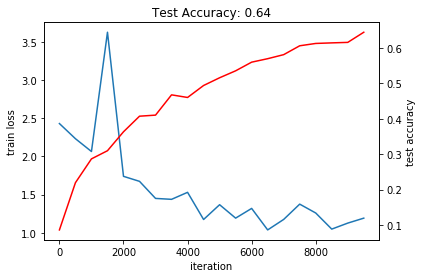

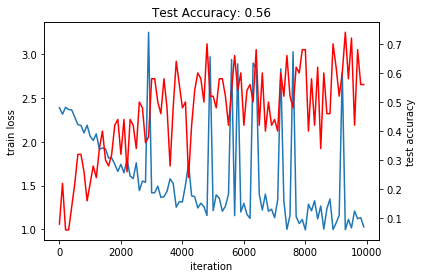

In [10]:
show_plots(test_loss, test_acc, test_interval)
show_plots(train_loss, train_acc, train_interval)

In [11]:
solver = caffe.NesterovSolver('proto/vgg10_solver.prototxt')
train_loss, train_acc, train_interval, test_loss, test_acc, test_interval = start_solver(solver)

###### Iterration #0
Train net output:
Loss: 2.3290116786956787
Train accuracy: 0.20000000298023224
Test net output:
Test loss: 2.4292337894439697
Test accuracy: 0.0964
###### Iterration #100
Train net output:
Loss: 2.430136203765869
Train accuracy: 0.07999999821186066
###### Iterration #200
Train net output:
Loss: 2.43801212310791
Train accuracy: 0.11999999731779099
###### Iterration #300
Train net output:
Loss: 2.3735523223876953
Train accuracy: 0.07999999821186066
###### Iterration #400
Train net output:
Loss: 2.3537142276763916
Train accuracy: 0.11999999731779099
###### Iterration #500
Train net output:
Loss: 2.412001132965088
Train accuracy: 0.07999999821186066
Test net output:
Test loss: 2.4299559593200684
Test accuracy: 0.104
###### Iterration #600
Train net output:
Loss: 2.4646525382995605
Train accuracy: 0.10000000149011612
###### Iterration #700
Train net output:
Loss: 2.5508382320404053
Train accuracy: 0.0
###### Iterration #800
Train net output:
Loss: 2.431375741958618
Trai

Test loss: 2.4742684364318848
Test accuracy: 0.0904
###### Iterration #7100
Train net output:
Loss: 2.3751723766326904
Train accuracy: 0.14000000059604645
###### Iterration #7200
Train net output:
Loss: 2.5388219356536865
Train accuracy: 0.11999999731779099
###### Iterration #7300
Train net output:
Loss: 2.4280104637145996
Train accuracy: 0.07999999821186066
###### Iterration #7400
Train net output:
Loss: 2.4478535652160645
Train accuracy: 0.11999999731779099
###### Iterration #7500
Train net output:
Loss: 2.4003124237060547
Train accuracy: 0.10000000149011612
Test net output:
Test loss: 2.433732748031616
Test accuracy: 0.0942
###### Iterration #7600
Train net output:
Loss: 2.443265914916992
Train accuracy: 0.11999999731779099
###### Iterration #7700
Train net output:
Loss: 2.394401788711548
Train accuracy: 0.10000000149011612
###### Iterration #7800
Train net output:
Loss: 2.3436386585235596
Train accuracy: 0.14000000059604645
###### Iterration #7900
Train net output:
Loss: 2.48822546

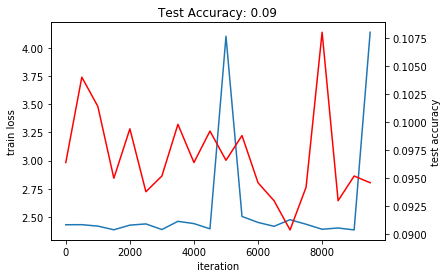

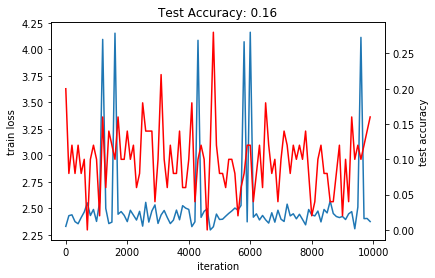

In [12]:
show_plots(test_loss, test_acc, test_interval)
show_plots(train_loss, train_acc, train_interval)

# After train

In [ ]:
from caffe import layers as L, params as P
import caffe

caffe.set_mode_gpu()
caffe.set_device(1)

In [ ]:
trained_net = caffe.Net('proto/vgg10_test.prototxt', 'vgg10_100k_lr1e-1_iter_100000.caffemodel', caffe.TEST)

In [ ]:
[(k, v.data.shape) for k, v in trained_net.blobs.items()]

In [ ]:
trained_net.forward()

In [ ]:
acc = trained_net.forward()['accuracy_top1']

In [ ]:
decay = 0.999
for i in range(100):
    acc = acc*decay + (1 - decay)*trained_net.forward()['accuracy_top1']

In [ ]:
acc